In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

Computer = "SciClone"   # "SciClone"    "WinLap"  "LinLap"   "Desktop"  "PortLap"

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.40', '0.00', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')
PlotWidthIn = 11
PlotHeightIn = 3.75
PlotDPI = 600

In [2]:
Saving = True
import CoreFunctions as cf
import platform
import multiprocessing
from joblib import Parallel, delayed
import os

In [3]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

if Computer == "SciClone":
    location = '/sciclone/home20/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\Laser Data\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'
    

if Computer ==  "SciClone":
    rootfolder = '/sciclone/home20/dchendrickson01/'
    folder = '/sciclone/scr10/dchendrickson01/Laser Data/'
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder #+ "SmallCopy\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "SmallCopy\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'SmallCopy/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'SmallCopy\\'


In [4]:
def getDataFromfiles(file):
    try:
        DS = np.genfromtxt(open(file,'r'), delimiter=',',skip_header=0)
        if np.shape(DS)[1]==4:
            DS = DS[:,2:4]
    except:
        print('Fail on file',file)
        DS = file
    return DS

In [5]:
files = os.listdir(folder)

In [6]:
temp = []
for file in files:
    if file[:10]=='Test Stand':
        temp.append(file)

In [7]:
files = temp

In [8]:
AllData = Parallel(n_jobs=3)(delayed(getDataFromfiles)(folder + file) for file in files)

In [9]:
for i in range(len(files)):
    print(i, files[i],np.shape(AllData[i]))

0 Test Stand 120Hz at 200khz sampling.csv (600000, 2)
1 Test Stand 15000Hz at 200khz sampling.csv (600000, 2)
2 Test Stand 3khz at 50khz sampling.csv (599984, 2)
3 Test Stand 5000Hz at 200khz sampling.csv (600000, 2)
4 Test Stand 500Hz at 200khz sampling.csv (599997, 2)
5 Test Stand 500hz at 50khz sampling - high volume - 0.00 um.csv (599999, 2)
6 Test Stand 500hz at 50khz sampling - high volume.csv (600000, 2)
7 Test Stand 500hz at 50khz sampling.csv (599994, 2)
8 Test Stand 60Hz at 200khz sampling.csv (600000, 2)
9 Test Stand at rest at 200khz sampling.csv (600000, 2)


In [10]:
x = [9,8,0,4,3,1]

In [11]:
def PrintPictures(g):
    DataSet = AllData[g]
    DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
    DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)
    Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),1)
    Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),1)
    Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),1)
    Head1 -= np.average(Head1)
    Head2 -= np.average(Head2)
    Diff -= np.average(Diff)
    DifferenceSet -= np.average(DifferenceSet)
    #fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=600)
    #plt.plot(Head1)
    #plt.plot(Head2)
    #plt.plot(DifferenceSet)
    #plt.plot(Diff)
    #plt.title(files[g] + ' Differences Only')
    #plt.plot(DataSet[3,:])
    #plt.savefig(rootfolder+'image/TrackLasers/'+'DifferencesOnly' +files[g][:-4]+'.png')
    #plt.show()
    FullFP2 = cf.getThumbprint2(Diff, 'sym6',250,1,8)
    hh = cf.PlotFingerPrint(FullFP2[320000:322000].T,'250 Scales Difference - ' +files[g][:-4], rootfolder+'image/TrackLasers/', False)


In [12]:
#Things = Parallel(n_jobs=3)(delayed(PrintPictures)(g) for g in range(len(files)))


In [38]:
FileToDo = 1
DataSet = AllData[FileToDo]

In [39]:
DifferenceSet = np.matrix(np.subtract(DataSet[:,0],DataSet[:,1])).T
DataSet = np.concatenate((DataSet, DifferenceSet), axis = 1)

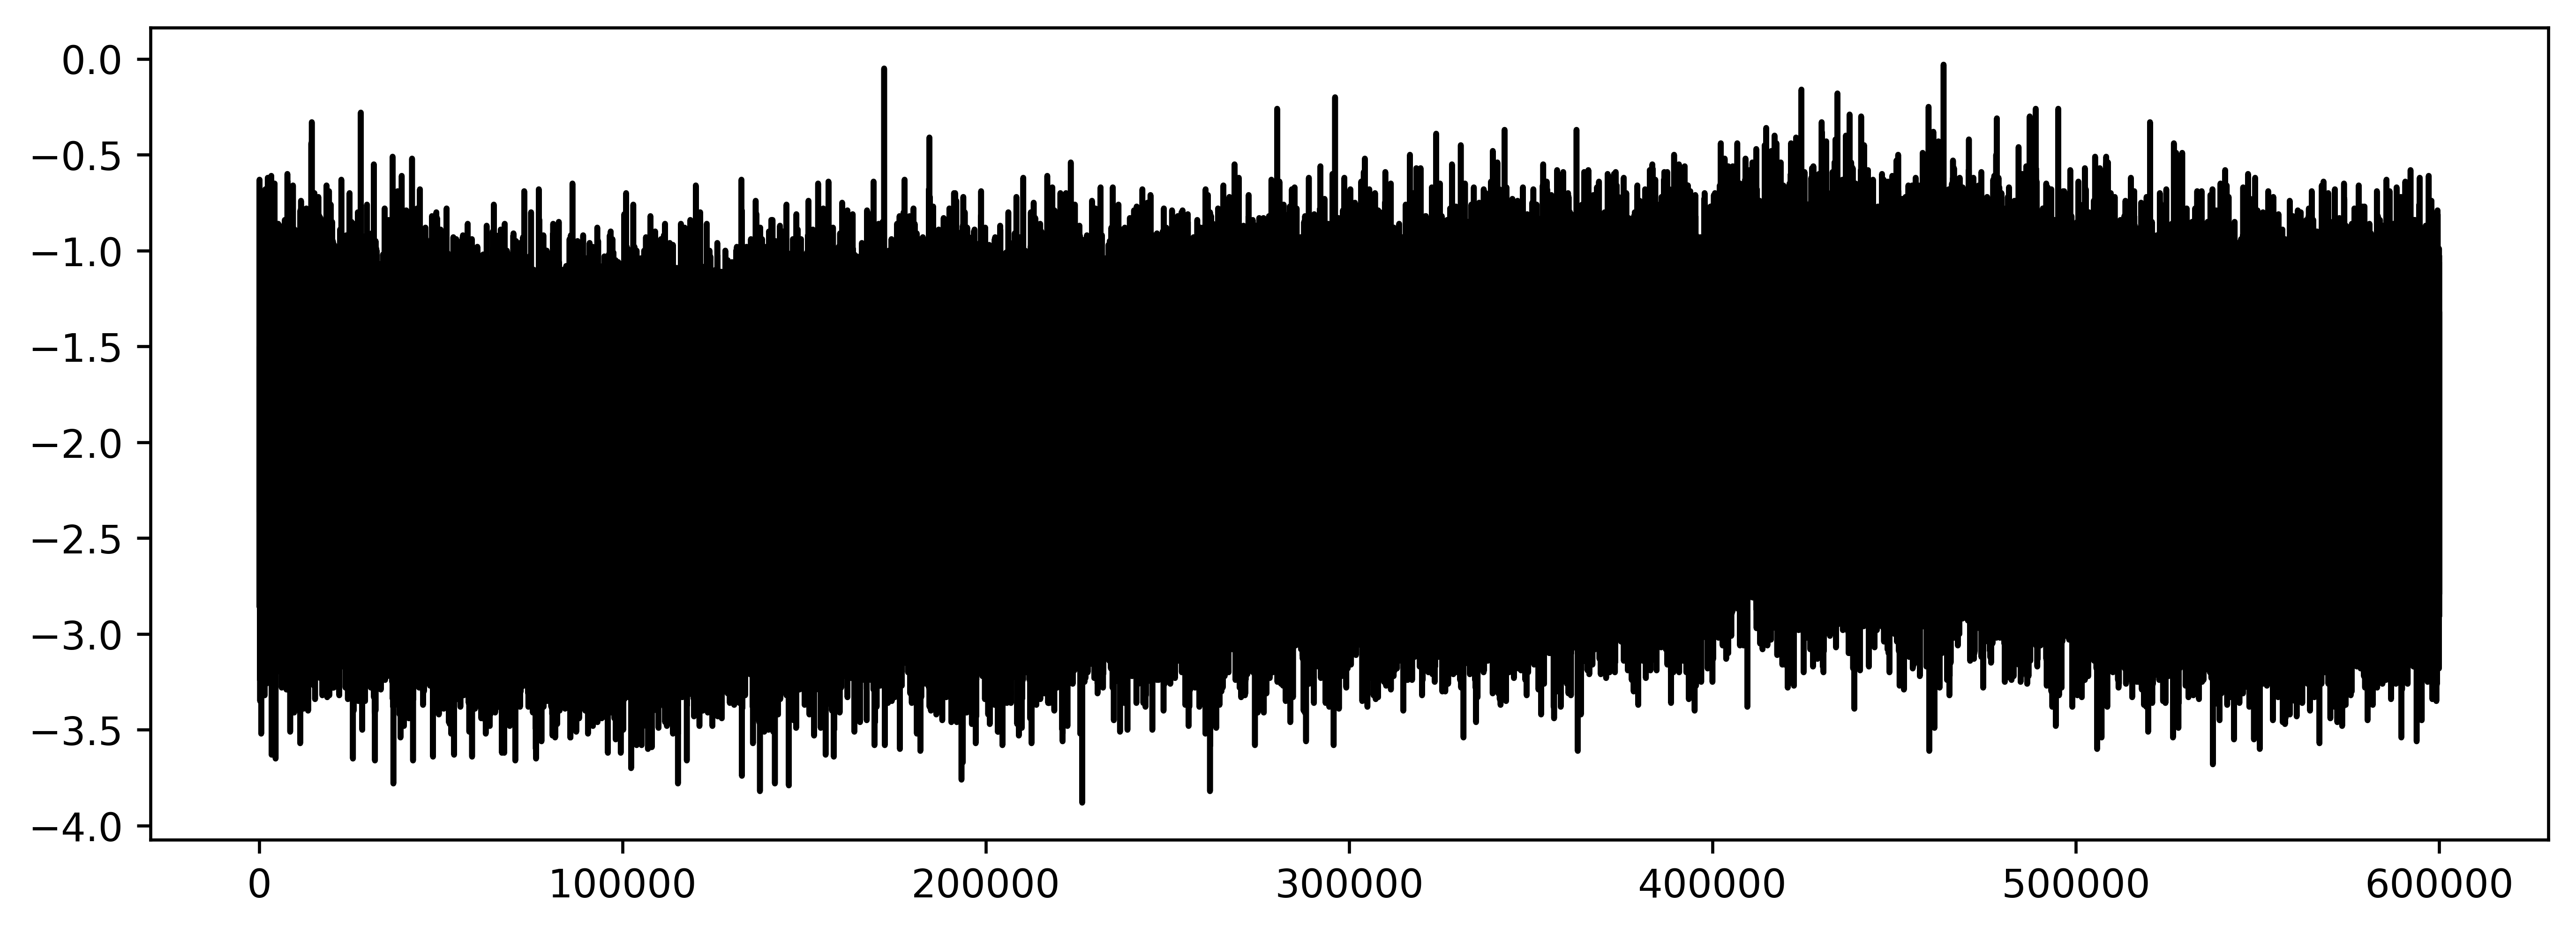

In [40]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
#plt.plot(DataSet[:,0])
plt.plot(DataSet[:,1])
#plt.plot(DataSet[:,2])
#plt.plot(DataSet[3,:])
plt.show()

In [41]:
Head1 = cf.Smoothing(np.array(DataSet[:,0]).flatten(),2)
Head2 = cf.Smoothing(np.array(DataSet[:,1]).flatten(),2)
Diff = cf.Smoothing(np.array(DataSet[:,2]).flatten(),2)

In [42]:
Normed1 = DataSet[:,0] - np.average(DataSet[:,0])
Normed2 = DataSet[:,1] - np.average(DataSet[:,1])
NormedDiff = DataSet[:,2] - np.average(DataSet[:,2])

In [43]:
Head1 -= np.average(Head1)
Head2 -= np.average(Head2)
Diff -= np.average(Diff)

In [44]:
start = 20000
end = 50000

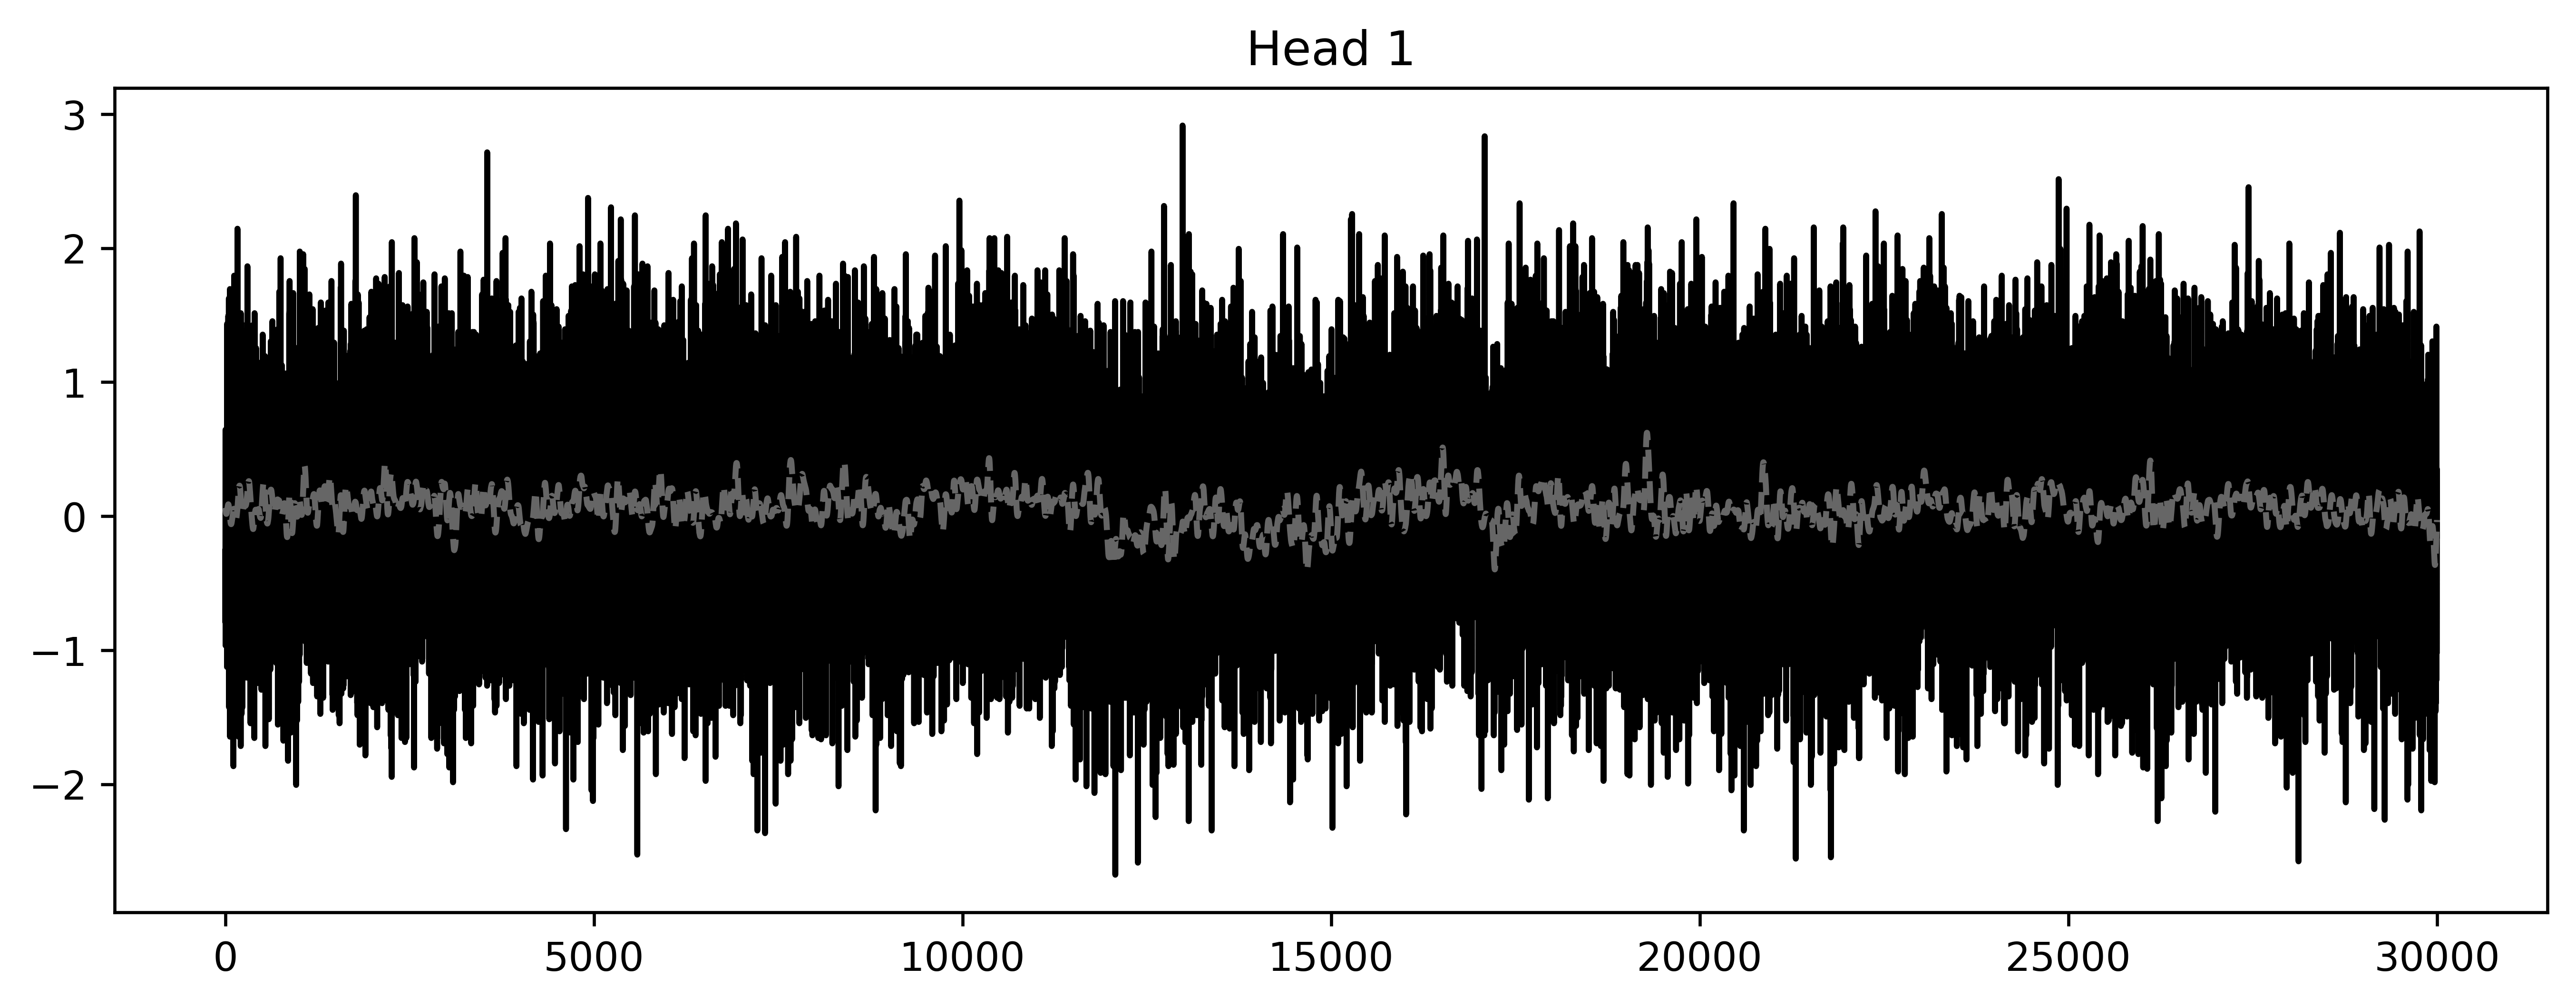

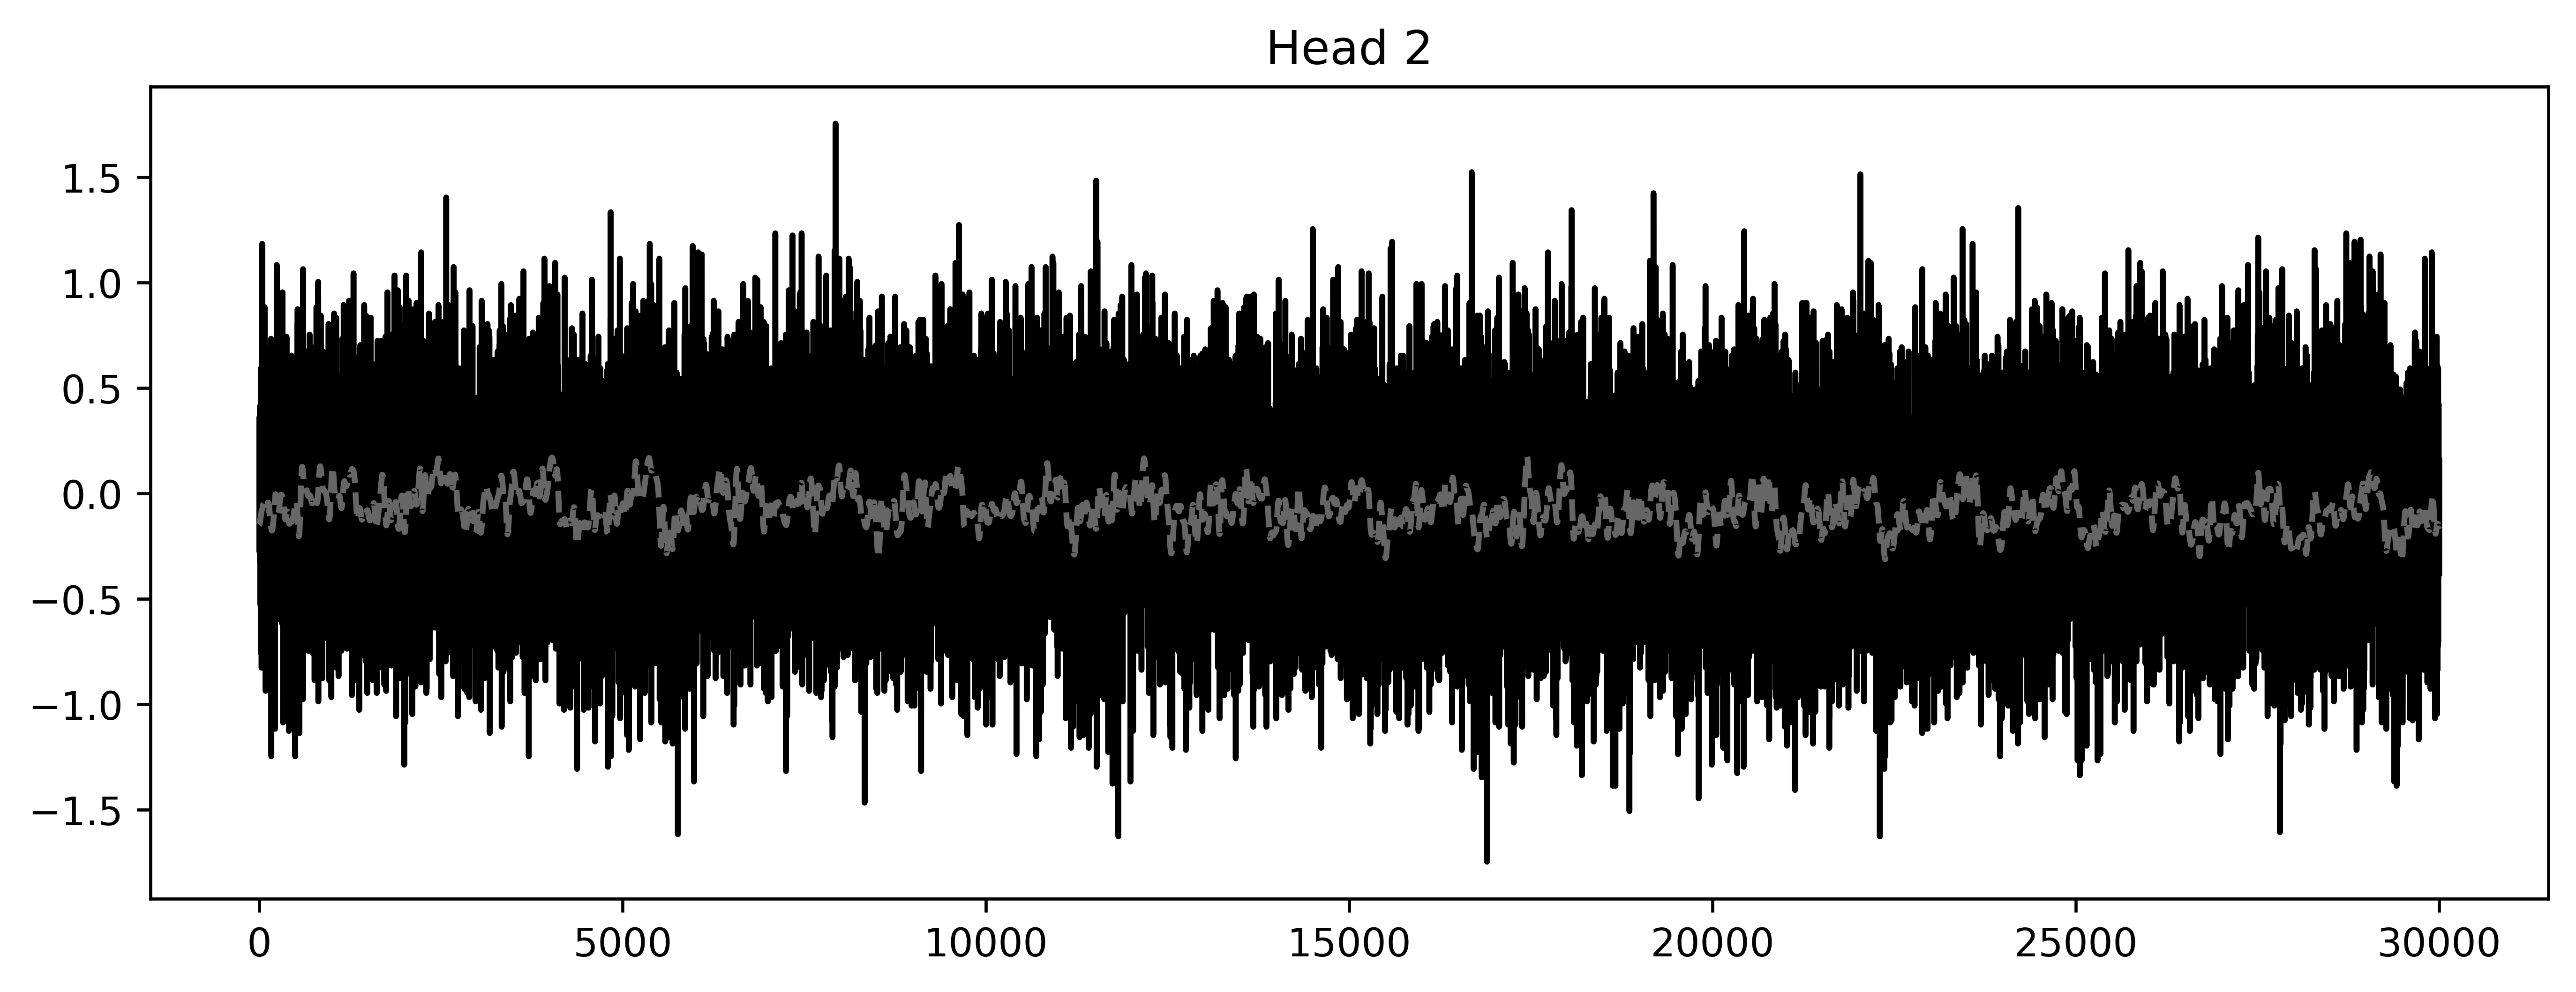

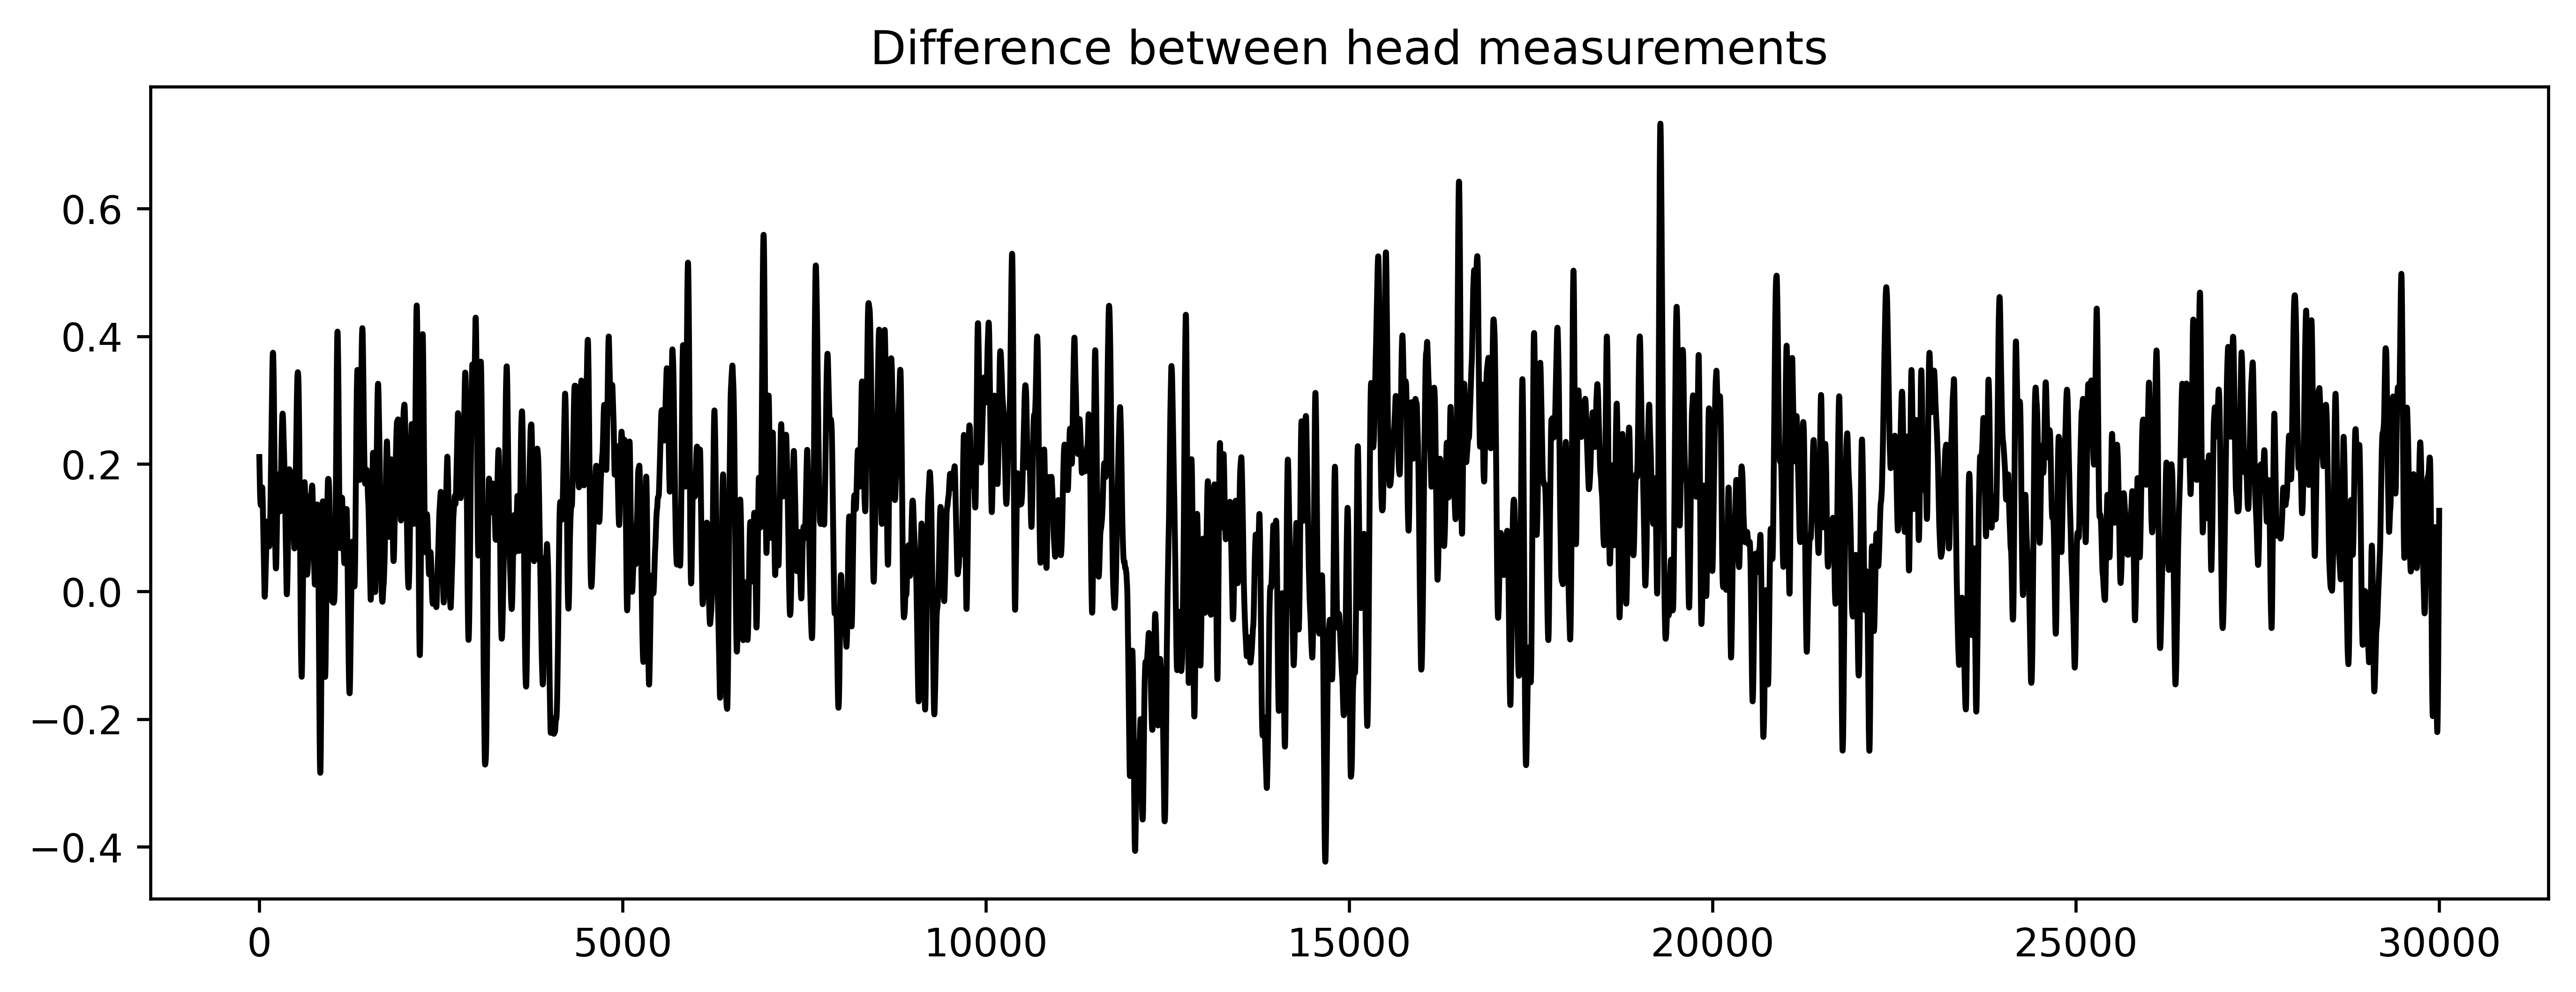

In [45]:
fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Normed1[start:end])
plt.plot(Head1[start:end])
plt.title('Head 1')
plt.show()

fig = plt.figure(figsize=(PlotWidthIn, PlotHeightIn),dpi=PlotDPI)
plt.plot(Normed2[start:end])
plt.plot(Head2[start:end])
plt.title('Head 2')
plt.show()

fig = plt.figure(figsize=(PlotWidthIn,PlotHeightIn),dpi=PlotDPI)
plt.plot(Diff[start:end])
plt.title('Difference between head measurements')
#plt.plot(DataSet[3,:])
plt.show()

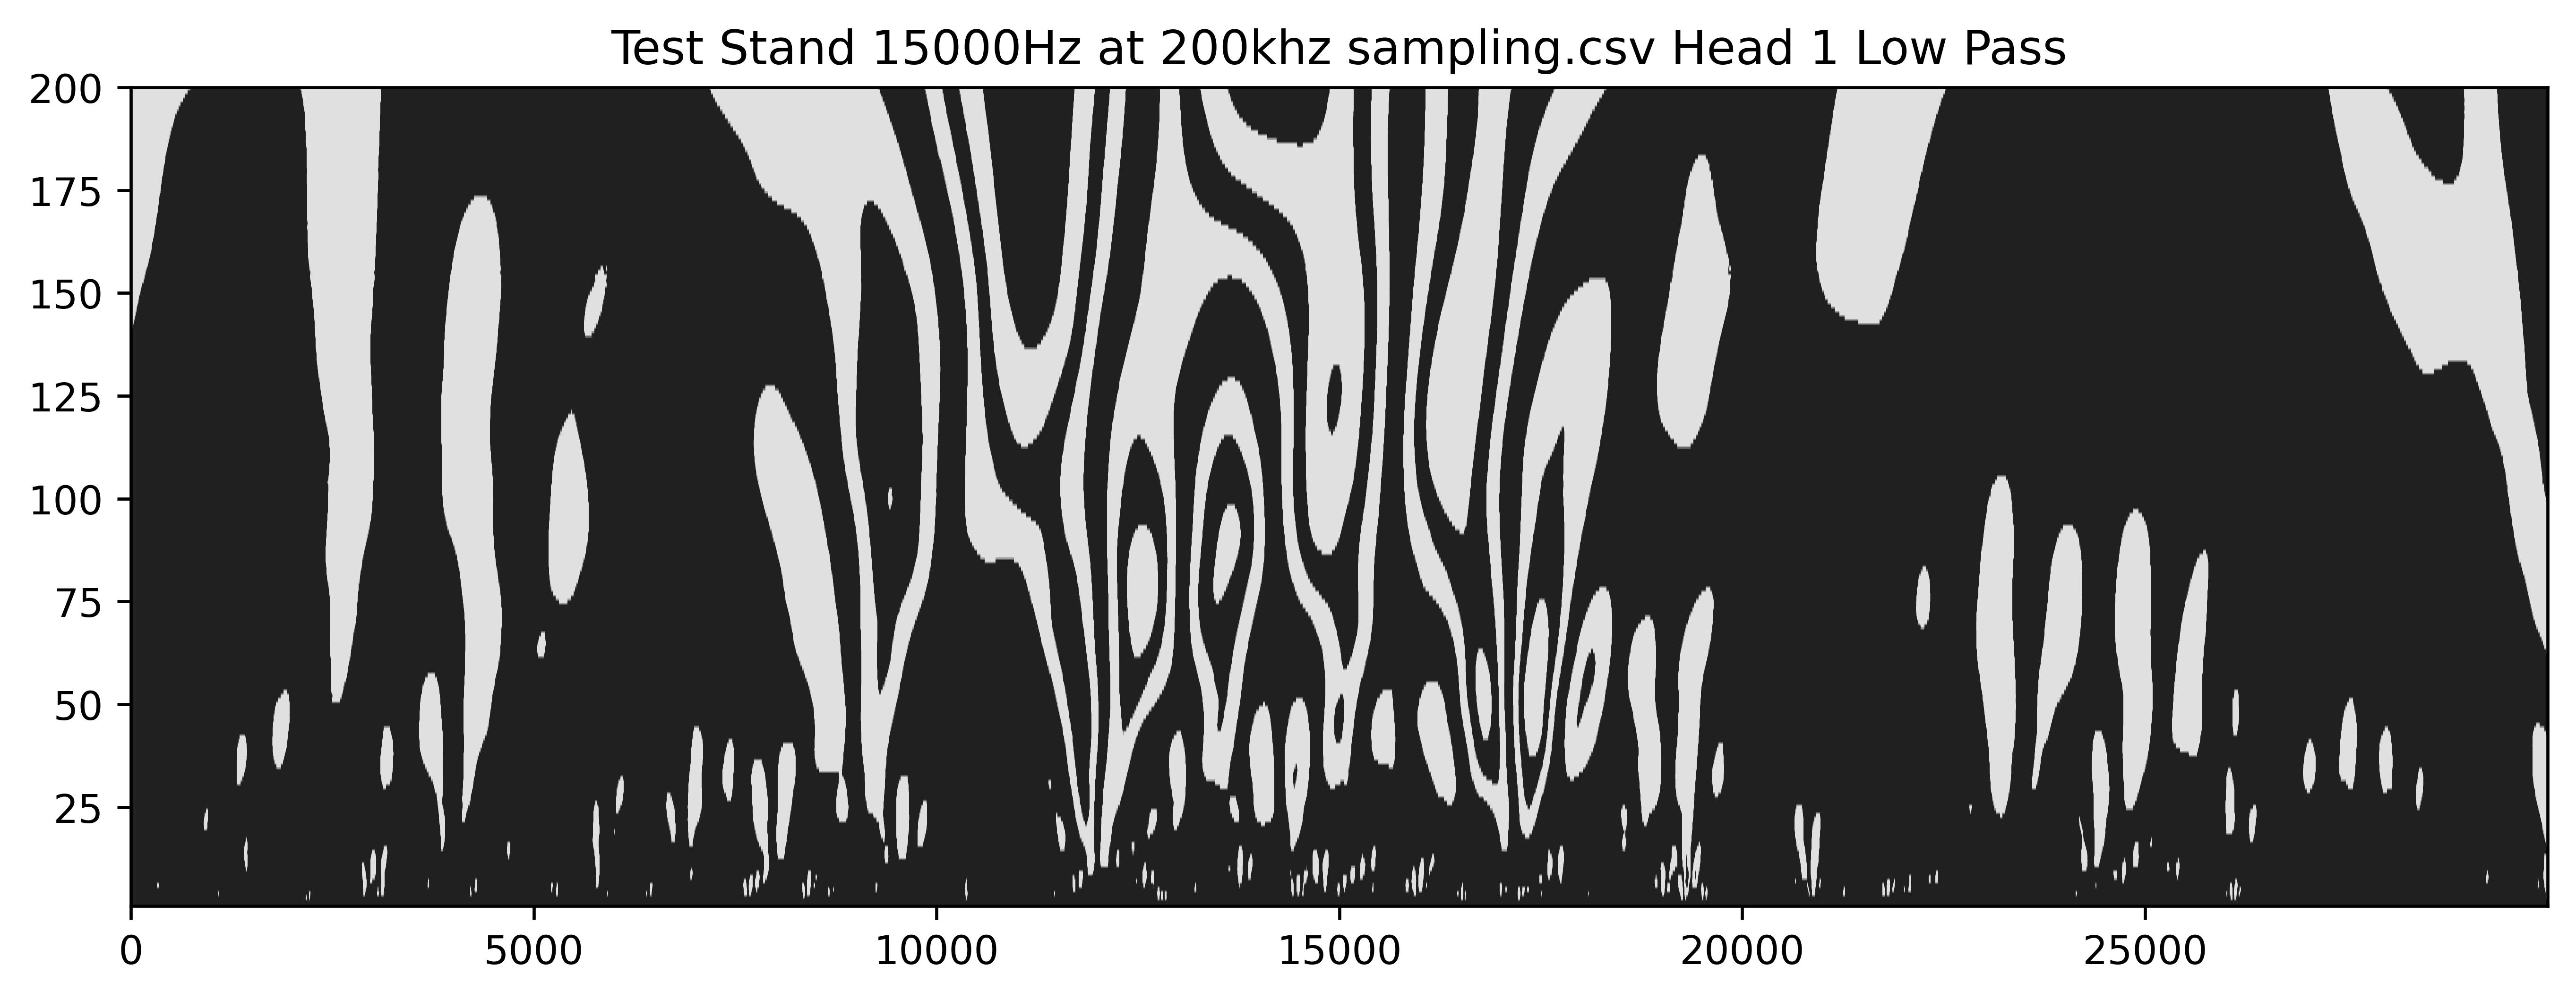

In [46]:
FullFP1 = cf.getThumbprint2(Head1, 'sym5',200,20)
#PlotFingerPrint(data, title = '', SaveSpot = location, ToSave = Saving, Show = True)
h = cf.PlotFingerPrint(FullFP1[start:end].T,files[FileToDo]+' Head 1 Low Pass',ToSave=False,Pdpi =PlotDPI)

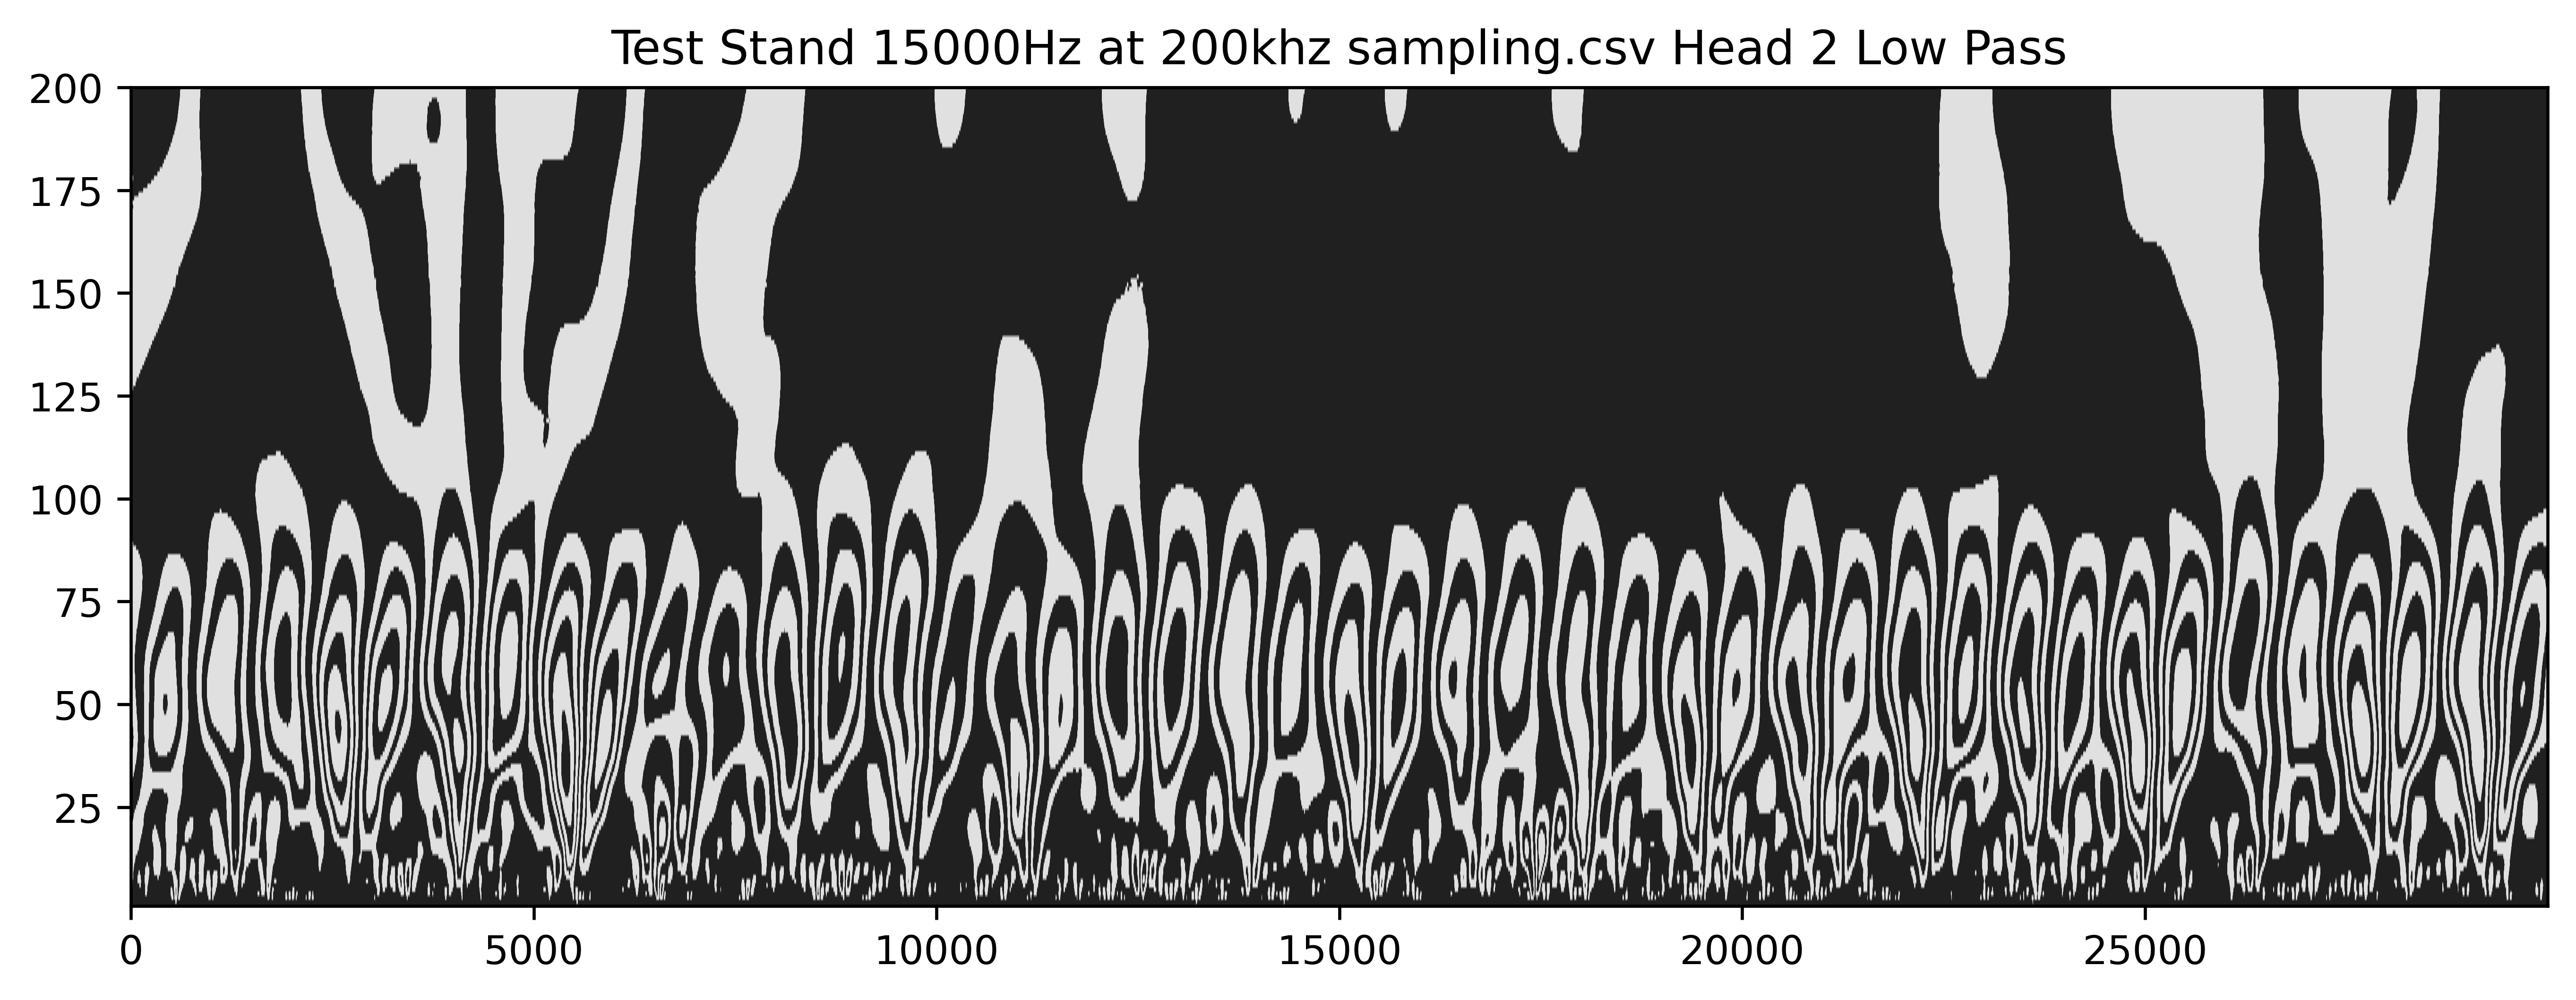

In [47]:
FullFP2 = cf.getThumbprint2(Head2, 'sym5',200,20)
hh = cf.PlotFingerPrint(FullFP2[start:end].T,files[FileToDo]+' Head 2 Low Pass',ToSave=False,Pdpi =PlotDPI )

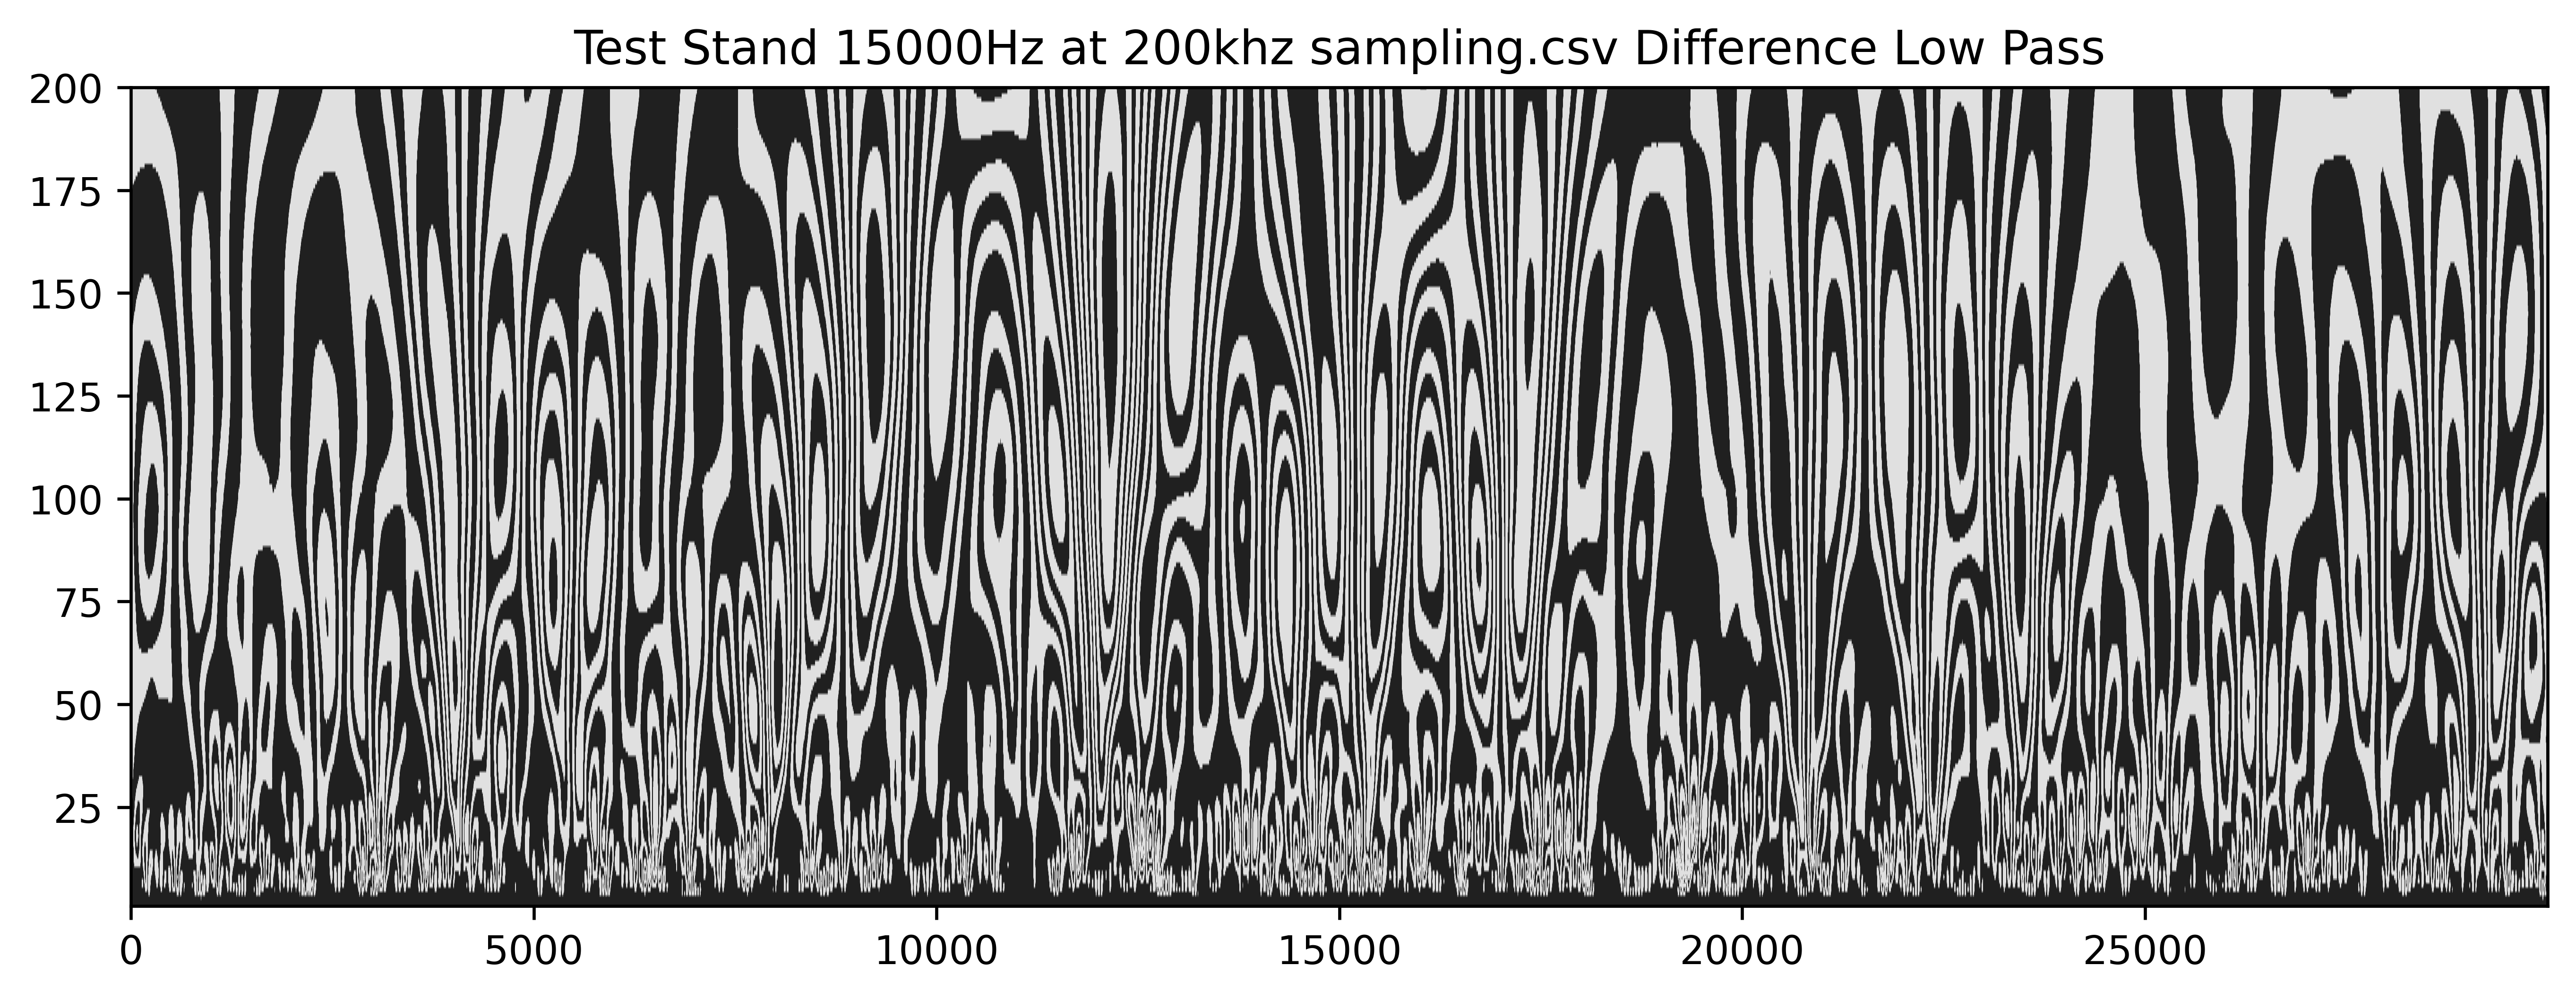

In [48]:
FullFP2 = cf.getThumbprint2(Diff, 'sym6',200,10,10)
hh = cf.PlotFingerPrint(FullFP2[start:end].T,files[FileToDo]+' Difference Low Pass',ToSave=False,Pdpi =PlotDPI)